In [91]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
import warnings
warnings.filterwarnings('ignore')

### Connection with Database

In [92]:
# create a connection 
conn = psycopg2.connect(
    host="localhost",
    database="internproject",   
    user="postgres",       
    password="Yusufrazakhan12@", 
    port="5432"
)

In [93]:
cur = conn.cursor()

# Table names fetch
cur.execute("""
    SELECT table_name 
    FROM information_schema.tables
    WHERE table_schema = 'public';
""")

tables = cur.fetchall()

# Print table names
print("Tables in database:")
for table in tables:
    print(table[0])

Tables in database:
netflix1
supermart_grocery_sales


In [94]:
# fetch table 
data = pd.read_sql('SELECT * FROM "netflix1";', conn)
data.head(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."


### Data Understanding

In [95]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [96]:
# data shape
data.shape

(8790, 10)

In [97]:
# statistics description
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Data Preprocessing

In [98]:
# Check Null Values
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

##### There is no null values 

In [99]:
# Remove deplicate 
data.drop_duplicates(inplace = True)

In [100]:
# again check shape 
data.shape

(8790, 10)

##### No duplicate data in the dataset

### Convert date column to date&time formate

In [101]:
# First check the column 
data["date_added"]

0        9/25/2021
1        9/24/2021
2        9/24/2021
3        9/22/2021
4        9/24/2021
           ...    
8785     1/17/2017
8786     9/13/2018
8787    12/15/2016
8788     6/23/2018
8789      6/7/2018
Name: date_added, Length: 8790, dtype: object

In [102]:
# data formating
data['date_added'] = pd.to_datetime(data['date_added'],
                                    format="mixed" ,
                                    dayfirst=True,
                                   errors='coerce')

In [103]:
data.head(5)      # here the date formate is changed 

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [104]:
# Now extract day,month and year from the date _added column
data['Day'] = data['date_added'].dt.day
data['Month'] = data['date_added'].dt.month
data['year'] = data['date_added'].dt.year

In [105]:
data.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,Day,Month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,25,9,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",24,9,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",24,9,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",22,9,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",24,9,2021


In [106]:
# Now change the duration 
data['duration'] = data['duration'].str.extract('(\d+)').astype(int)
# df['duration_mins'] = df['duration'].str.extract('(\d+)').astype(float)

In [107]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,Day,Month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90,Documentaries,25,9,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",24,9,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",24,9,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91,"Children & Family Movies, Comedies",22,9,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies",24,9,2021


In [108]:
# # rename column name 
# data = data.rename(columns={
#     'listed_in': 'genres'
# })

In [109]:
data.head(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,Day,Month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90,Documentaries,25,9,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",24,9,2021


In [110]:
#Now Donwnload this clean data for tablue 
data1 = data.to_csv("netflix_clean.csv", index=False)
print(f"The data is saved properlly")

The data is saved properlly


## EDA (Exploratry Data Analysis)

####
1. Movies vs. TV Shows Distribution

In [111]:
# Count the number of Movies and TV Shows
Total_count = data['type'].value_counts()
Total_count

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

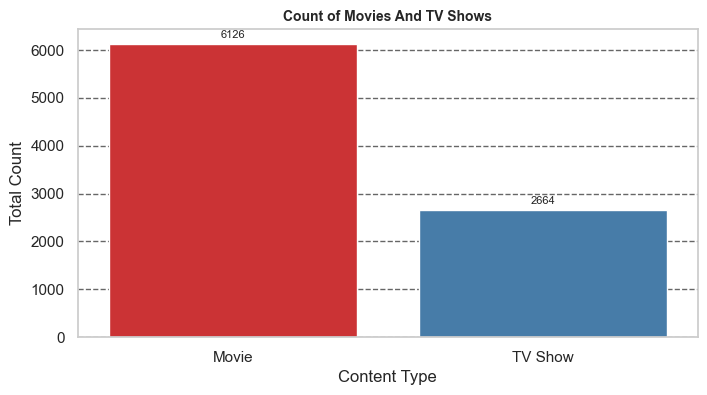

In [112]:
# plot the graph
plt.figure(figsize = (8,4))
ax = sns.barplot(x = Total_count.index , y = Total_count.values ,
           palette="Set1")
#Fot grid
plt.grid(axis='y', linestyle='--', alpha=0.6, color = "black")

# for label (numbering) 
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=8)   

# Label And Title 
plt.title("Count of Movies And TV Shows", fontsize = 10 , fontweight = "bold" )
plt.xlabel("Content Type",fontsize = 12)
plt.ylabel("Total Count", fontsize = 12)
plt.show()


##### The graph shows that Netflix has more movies than TV shows.
##### There are about 6,126 movies and 2,664 TV shows, which means Netflix mainly focuses on movies compared to TV shows.

# 
2. Most Common Genres 


In [113]:
# Split the 'listed_in' column and count genres
data['genres'] = data['listed_in'].apply(lambda x: x.split(',')) # split the genres in to the list
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10) # list converted in to series 

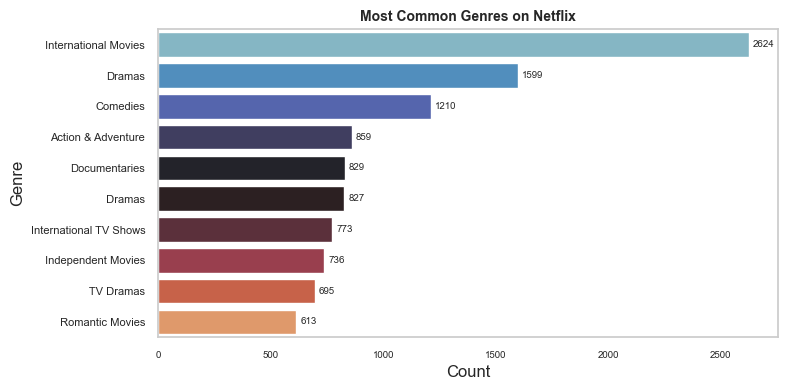

In [116]:
# Plot the most common genres
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=genre_counts.values,
            y=genre_counts.index,palette='icefire')

# for label 
for container in ax.containers:
    ax.bar_label(container,padding=3,fontsize=7)

ax.grid(False)
    
# for label and title 
plt.xticks( fontsize = 7)   # for x axis 
plt.yticks(fontsize = 8)    # for y axis
plt.title('Most Common Genres on Netflix', fontsize = 10 , fontweight = 'bold')
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Genre', fontsize = 12)
plt.show()

##### The graph shows that International Movies are the most popular genre on Netflix, 
##### followed by Dramas and Comedies, indicating that Netflix focuses heavily on international and drama-based content.

#
3. Top 10 popular movie genres


In [117]:
# top 10 popular movies
popular_mv=data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_sr=data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10 ]

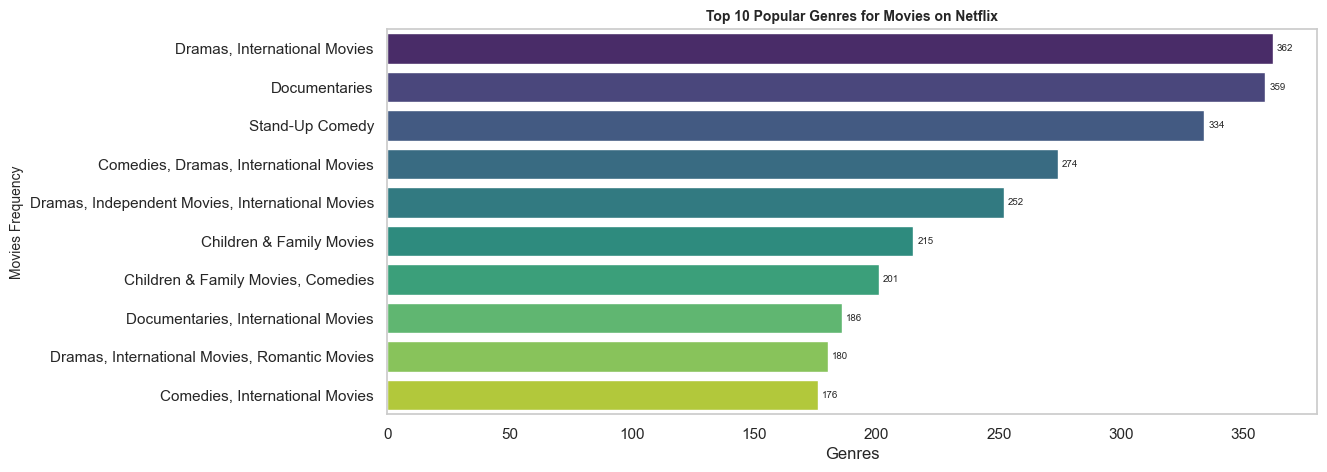

In [153]:
# plot graph top 10 popular movies
plt.figure(figsize=(12,5))
ax = sns.barplot(y=popular_mv.index,x=popular_mv.values,palette="viridis")

# for label 
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=7)
ax.grid(False)

# label and title 
plt.xlabel("Genres")
plt.ylabel("Movies Frequency", fontsize = 10)
plt.title("Top 10 Popular Genres for Movies on Netflix", fontsize = 10 , fontweight = "bold")
plt.show()

##### The graph shows that multi-genre movies,
##### especially Drama and International Movies, are the most popular on Netflix.

# 
4. Top 10 popular Series Genres

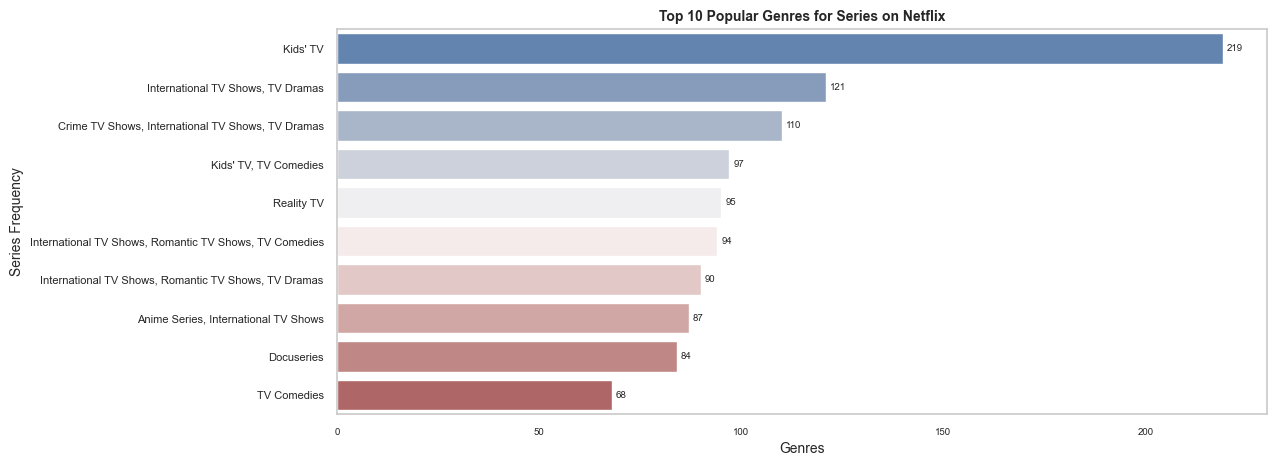

In [136]:
# plot grraph top 10 popular series
plt.figure(figsize=(12,5))
ax = sns.barplot(y=popular_sr.index,x=popular_sr.values,palette="vlag")

# for label 
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=7)

ax.grid(False)

# label and title 
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 8)
plt.xlabel("Genres", fontsize = 10)
plt.ylabel("Series Frequency", fontsize = 10)
plt.title("Top 10 Popular Genres for Series on Netflix" , fontsize = 10 , fontweight = "bold")
plt.show()

##### The chart shows that Kids’ TV and International TV Dramas - 
##### are the most popular series genres on Netflix.

# 
5. Content Added Over Time


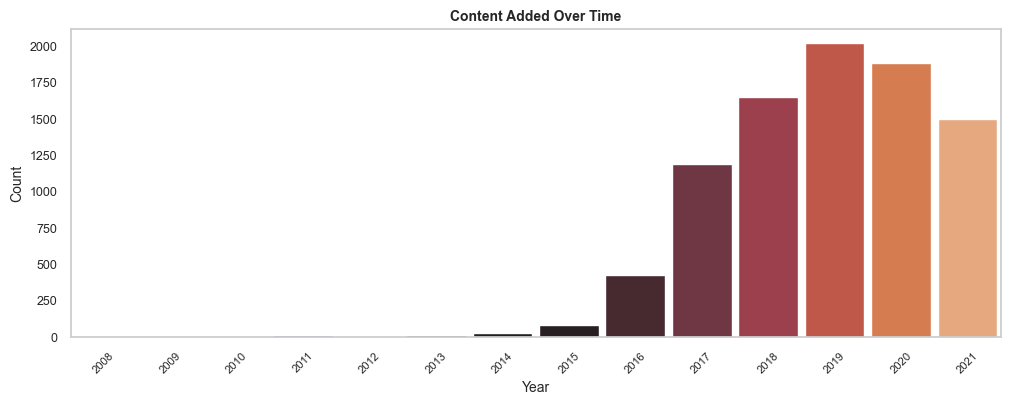

In [154]:
# Plot content added over the Time
plt.figure(figsize=(12,4))
sns.countplot(x='year', data=data, palette='icefire',width=0.9)

plt.grid(False)

# label and title
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 9)
plt.title('Content Added Over Time',fontsize = 10,fontweight = "bold")
plt.xlabel('Year',fontsize = 10)
plt.ylabel('Count',fontsize = 10)
plt.xticks(rotation=45)
plt.show()

##### The chart shows that Kids’ TV and International TV Dramas are the most popular series genres on Netflix.

#
6.  Monthly releases of Movies and TV shows on Netflix


In [77]:
# count monthely release movies and tv shows
monthly_mv=pd.DataFrame(data[data['type']=='Movie']['Month'].value_counts().sort_index())
monthly_sr=pd.DataFrame(data[data['type']=='TV Show']['Month'].value_counts().sort_index())

In [78]:
monthly_combined = pd.concat([monthly_mv, monthly_sr],axis=1,keys=['Movies', 'TV Shows'])

In [79]:
monthly_combined

,Movies,TV Shows
,count,count
Month,,
1,1901,606
2,457,174
3,353,193
4,410,194
5,371,172
6,388,211
7,393,175
8,380,189


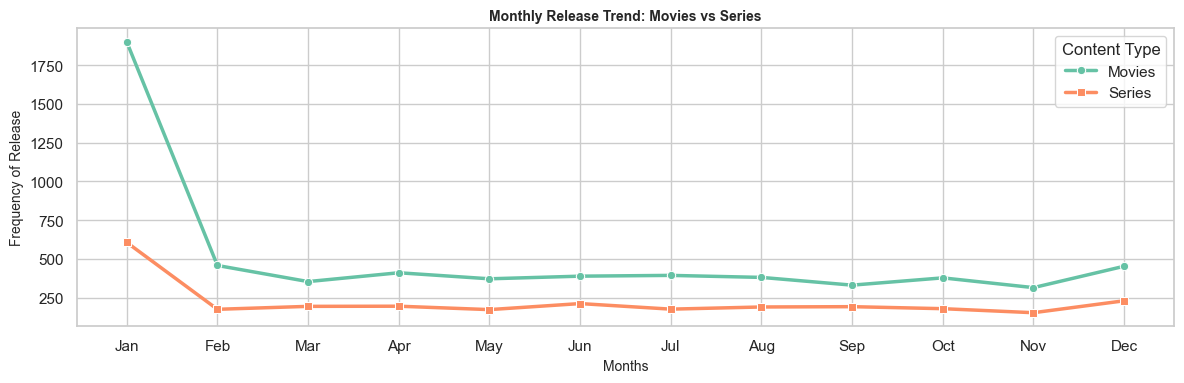

In [133]:
# plot graph monthly release movie and tv shows 

# Set seaborn theme
sns.set_theme(style="whitegrid", palette="Set2")
plt.figure(figsize=(12, 4))

# Line plots
sns.lineplot(x=monthly_mv.index,y=monthly_mv.squeeze(), label="Movies",linewidth=2.5,marker="o")
sns.lineplot(x=monthly_sr.index,y=monthly_sr.squeeze(),label="Series",linewidth=2.5,marker="s")

# X-axis labels
plt.xticks(range(1, 13),
           ['Jan','Feb','Mar','Apr','May','Jun',
            'Jul','Aug','Sep','Oct','Nov','Dec'])

# Labels & title
plt.xlabel("Months", fontsize=10)
plt.ylabel("Frequency of Release", fontsize=10)
plt.title("Monthly Release Trend: Movies vs Series",
          fontsize=10, fontweight="bold")

# Legend
plt.legend(title="Content Type")
plt.tight_layout()
plt.show()

##### Movies are released more than series throughout the year,
##### with a strong peak in April. After that, releases remain fairly stable, and movies continue to dominate.

#
7 Yearly releases of Movies and TV Shows on Netflix

In [33]:
# count yearly release movie and tv shows 
yearly_mv=data[data['type']=='Movie']['year'].value_counts().sort_index()
yearly_sr=data[data['type']=='TV Show']['year'].value_counts().sort_index()

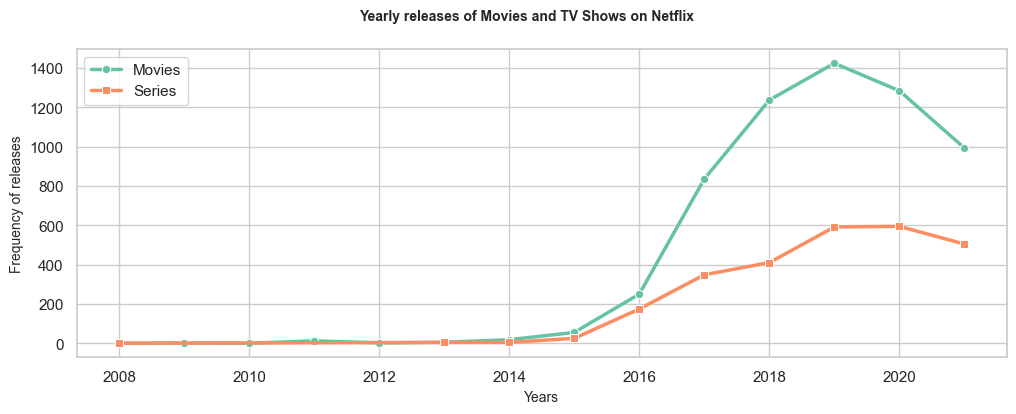

In [132]:
# plot graph 
sns.set_theme(style="whitegrid", palette="Set2")
plt.figure(figsize=(12, 4))

# line plot 
sns.lineplot(x=yearly_mv.index,y=yearly_mv.squeeze(), label="Movies",linewidth=2.5,marker="o")
sns.lineplot(x=yearly_sr.index,y=yearly_sr.squeeze(),label="Series",linewidth=2.5,marker="s")

# label and title
plt.xlabel("Years", fontsize = 10)
plt.ylabel("Frequency of releases" , fontsize = 10)
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix", fontsize = 10 , fontweight = "bold")
plt.legend()
plt.show()


##### Netflix releases increased rapidly after 2015,
##### with movies consistently outnumbering series. Releases peaked around 2019–2020 and then slightly declined

#
8. Top 10 Directors with the Most Titles

In [127]:
# Count titles by director
top_director = data['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:11]
top_director

,director,count
1,Rajiv Chilaka,20
2,Alastair Fothergill,18
3,"Raúl Campos, Jan Suter",18
4,Marcus Raboy,16
5,Suhas Kadav,16
6,Jay Karas,14
7,Cathy Garcia-Molina,13
8,Youssef Chahine,12
9,Martin Scorsese,12
10,Jay Chapman,12


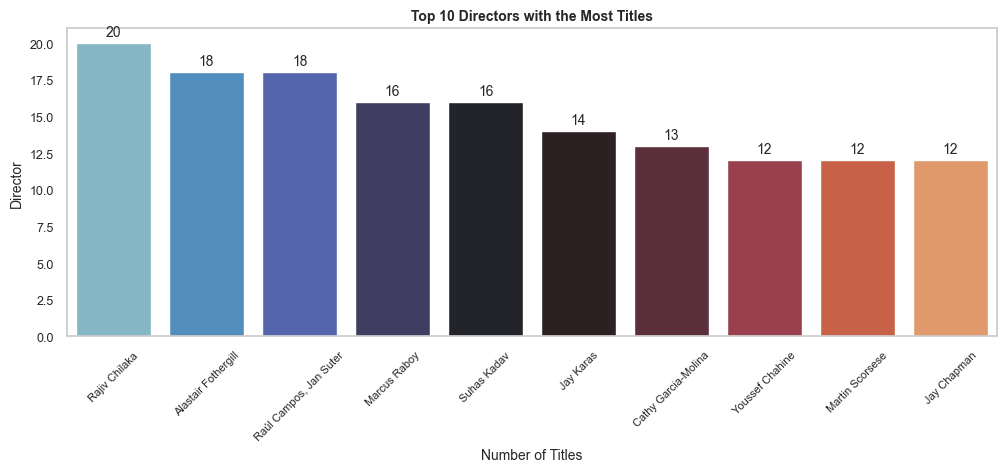

In [156]:
#plot graph
plt.figure(figsize=(12, 4))
ax = sns.barplot(x = top_director['director'],y = top_director['count'] ,palette='icefire')
# for label and title 
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10)

ax.grid(False)

# title and labels 
plt.xticks(fontsize = 8,rotation=45),
plt.yticks(fontsize = 9)
plt.title('Top 10 Directors with the Most Titles', fontsize = 10 , fontweight = "bold")
plt.xlabel('Number of Titles',fontsize = 10)
plt.ylabel('Director', fontsize = 10)
plt.show()


##### The graph shows that Rajiv Chilaka has the highest number of titles on Netflix, 
##### followed by Alastair Fothergill and Jan Suter, while the remaining directors have slightly lower but comparable counts.

#
9 . Top 10 countries with most content on Netflix

In [139]:
top_10_coun=data['country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]
top_10_coun

,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


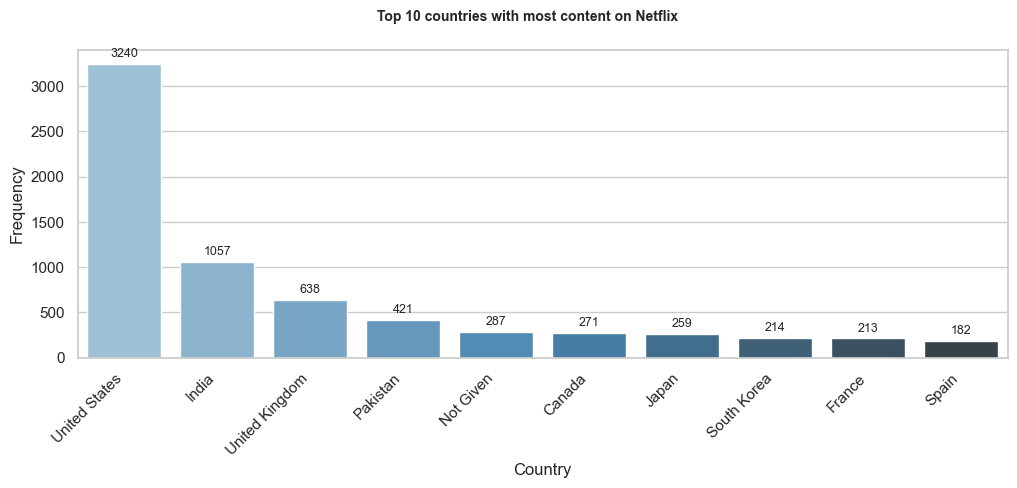

In [150]:
plt.figure(figsize=(12, 4))
ax = sns.barplot(x=top_10_coun['country'], y=top_10_coun['count'], palette='Blues_d')

# add labels on bars
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9)

plt.xticks(rotation=45,ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle("Top 10 countries with most content on Netflix", fontsize = 10 , fontweight = "bold")
plt.show()

##### The chart indicates that the United States dominates Netflix content production, 
##### followed by India and the UK, while other countries contribute significantly fewer titles.

#
10 . Rating of Movies and Tv Shows

In [151]:
data['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

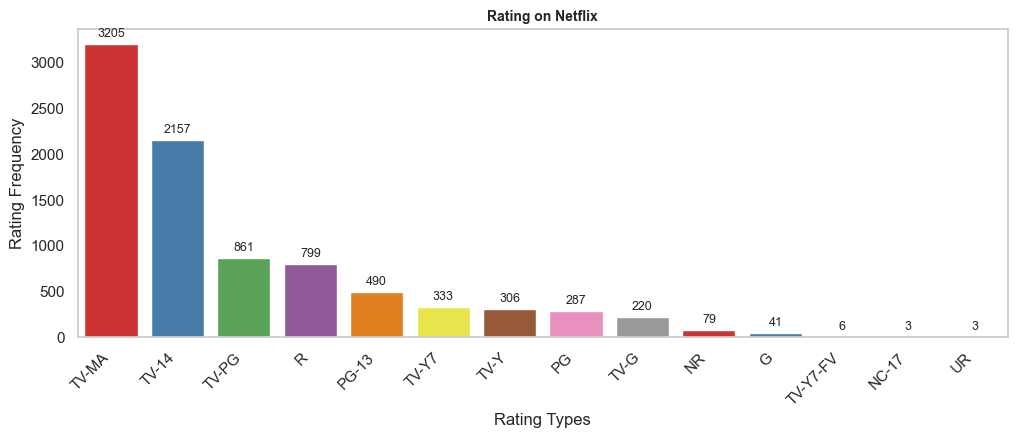

In [160]:
# plot graph 
ratings = data['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)

plt.figure(figsize=(12, 4))
ax = sns.barplot(x=ratings['rating'], y=ratings['count'], palette='Set1')

# add labels on bars
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9)

ax.grid(False)

plt.xticks(rotation=45, ha='right')
plt.title('Rating on Netflix' , fontsize = 10 , fontweight = "bold")
plt.xlabel('Rating Types')
plt.ylabel('Rating Frequency')
plt.show()

##### This graph shows the distribution of content ratings on Netflix.
##### Most of the content is rated TV-MA and TV-14, meaning it is mainly for adults and teenagers.
##### Content meant for children has the lowest presence on Netflix.